In [87]:
from scipy.io import loadmat
import numpy as np
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [88]:
def zeromean(A):
    mean = A.mean(axis=0)
    return A - mean

In [3]:
house_data = loadmat("housing_dataset/housing_data.mat")
Ytrain = house_data["Ytrain"]
Xtrain = house_data["Xtrain"]
Xvalidate = house_data["Xvalidate"]
Yvalidate = house_data["Yvalidate"]
Xtrain = zeromean(Xtrain)
Xvalidate = zeromean(Xvalidate)
print(Xtrain.shape)
print(Xvalidate.shape)

(19440, 8)
(1200, 8)


In [4]:
print(Xtrain.T.dot(np.ones(Xtrain.shape[0])))
print(Xvalidate.T.dot(np.ones(Xvalidate.shape[0])))

[ -6.69331257e-12   1.81898940e-11   1.03609636e-08   2.72120815e-09
   5.63522917e-09   3.17049853e-09  -6.56825705e-11  -5.03675324e-10]
[  4.24549285e-13   2.28794761e-12  -8.80390871e-10  -4.00177669e-11
  -5.22049959e-10   2.91038305e-11   2.48689958e-13  -2.55795385e-13]


In [38]:
def ridge(L, trainx, trainy, validx, validy):
    w = np.linalg.inv(trainx.T.dot(trainx) + L*np.eye(trainx.shape[1])).dot(trainx.T).dot(trainy)
    yhat = np.dot(validx, w)
    residual = yhat - validy
    return np.sum(np.power(residual + np.mean(validy), 2)) + L * np.sum(np.power(w, 2)), np.sum(np.power(residual + np.mean(validy), 2))

In [49]:
def kfold(L):
    rss = 0
    perm = np.random.permutation(Ytrain.shape[0])
    Xtrain2 = Xtrain[perm]
    Ytrain2 = Ytrain[perm]
    size = int(Xtrain.shape[0]/10)
    for i in range(10):
        rss += ridge(L, 
                    np.concatenate((Xtrain2[: size* i], Xtrain2[size * (i+1):])),
                    np.concatenate((Ytrain2[: size* i], Ytrain2[size * (i+1):])),
                    Xtrain2[size * i : size* (i + 1)], 
                    Ytrain2[size * i : size* (i + 1)])[0]
    return rss/10

In [50]:
ridge(0.1, Xtrain, Ytrain, Xvalidate, Yvalidate)

(5781414141653.8545, 5780891098684.5684)

In [51]:
Ls = np.logspace(-10, 20, 30)
Rss = [kfold(i) for i in Ls]

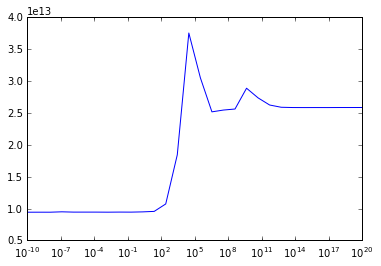

In [52]:
plt.semilogx(Ls, Rss)

15


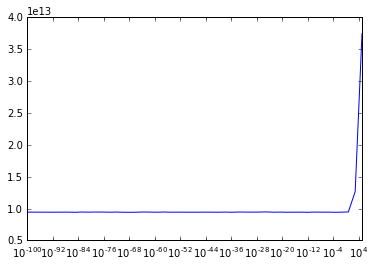

In [53]:
Ls = np.logspace(-100, 5, 50)
Rss = [kfold(i) for i in Ls]
plt.semilogx(Ls, Rss)
print(np.argmin(Rss))

7.44292233004e-07


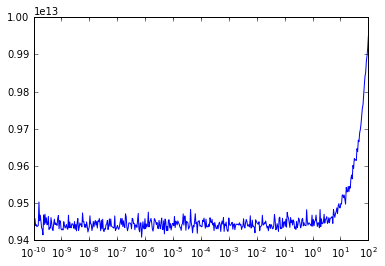

In [55]:
Ls = np.logspace(-10, 2, 500)
Rss = [kfold(i) for i in Ls]
plt.semilogx(Ls, Rss)
print(Ls[np.argmin(Rss)])

In [56]:
np.array([ridge(7.44292233004e-07, Xtrain, Ytrain, Xvalidate, Yvalidate)])

array([[  5.78088723e+12,   5.78088722e+12]])

In [57]:
w = np.dot(np.dot(np.linalg.inv(np.add(np.dot(Xtrain.T, Xtrain), 
                                           (7.44292233004e-07)*np.eye(Xtrain.shape[1]))), Xtrain.T), Ytrain)

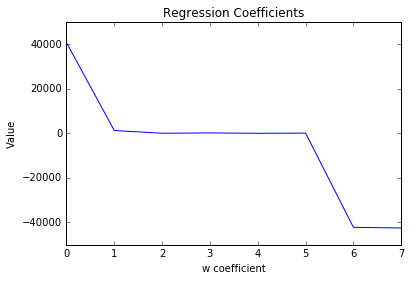

In [58]:
plt.plot(w)
plt.title("Regression Coefficients")
plt.xlabel("w coefficient")
plt.ylabel("Value")

In [66]:
X = np.array([[0,3,1],[1,3,1],[0,1,1],[1,1,1]])
y = np.array([1,1,0,0]).T

In [128]:
def logS(x):
    if "numpy.ndarray" in str(type(x)):
        x[x > 50] = 50
        x[x< -50] = -50
    return 1.0/(1.0+np.exp(-x))
def Risk(ka, y):
    si = logS(ka)
    si[si < 0.0000000001] = 0.0000000001
    si[si > 0.9999999999] = 0.9999999999
    R = np.dot(y, np.log(si))
    R += np.dot(1-y, np.log(1-si))
    return -R
def R(w, X, y):
    return Risk(X.dot(w), y)

In [90]:
w0 = np.array([-2,1,0])
R(w0, X, y)

1.9883724141284103

In [91]:
def mu(w, X):
    return logS(X.dot(w))

In [92]:
mu(w0, X)

array([ 0.95257413,  0.73105858,  0.73105858,  0.26894142])

In [93]:
def lograd(w, X, y):
    return np.dot(X.T, y-mu(w, X)).astype("float64")

In [72]:
w1 = w0 + lograd(w0, X, y)
print(w1)

[-2.          0.94910188 -0.68363271]


In [16]:
R(w1, X, y)

1.7206170956213045

In [17]:
mu(w1, X)

array([ 0.89693957,  0.54082713,  0.56598026,  0.15000896])

In [18]:
w2 = w1 + lograd(w1, X, y)
print(w2)

[-1.69083609  1.91981257 -0.83738862]


In [16]:
R(w2, X, y)

1.8546997847922486

In [17]:
mu(w2, X)

array([ 0.99276849,  0.96199213,  0.74695242,  0.35242149])

In [94]:
spam_data = loadmat("spam_dataset/spam_data.mat")
spamTest = spam_data["test_data"]
trainLabel = spam_data["training_labels"][0]
trainData = spam_data["training_data"]

print(spamTest.shape, trainLabel.shape, trainData.shape)

spam = np.array([(trainData[i], trainLabel[i]) for i in range(len(trainLabel))])
np.random.shuffle(spam)
trainLabel = np.zeros(trainLabel.shape)
trainLabel[:] = spam[:, 1]
trainData = np.zeros(trainData.shape)
for i in range(trainData.shape[0]):
    trainData[i, :] = spam[i][0]

(5857, 32) (5172,) (5172, 32)


In [95]:
def normalize(X):
    X = zeromean(X)
    std = X.std(axis = 0)
    X/=std
    return X

In [98]:
X1 = normalize(trainData)
print(X1.mean(axis=0), X1.std(axis=0))

[ -4.84257517e-16  -2.50691021e-16  -4.35937485e-16   1.83427219e-17
   7.47318337e-16   7.55727654e-16  -6.28053079e-16  -3.41084469e-16
   2.58581128e-16  -2.72827863e-16   5.34933445e-17  -9.96667731e-17
  -2.14660291e-16   2.67026669e-16  -1.71889228e-16  -9.39718356e-16
   7.13992327e-16   8.60954128e-16  -4.36785393e-16  -6.31959896e-17
  -5.39924297e-17   1.15685261e-15  -8.34899735e-16   3.44502934e-16
  -1.25522605e-16   8.66059018e-16  -3.08842494e-16   2.71534535e-16
  -7.62044033e-18  -1.14607129e-16  -6.83413968e-16  -3.55965794e-16] [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [99]:
X2 = np.log(trainData + 0.1)
print(X2, trainData)

[[-2.30258509 -2.30258509 -2.30258509 ...,  0.09531018 -2.30258509
  -2.30258509]
 [-2.30258509 -2.30258509 -2.30258509 ..., -2.30258509 -2.30258509
  -2.30258509]
 [-2.30258509 -2.30258509 -2.30258509 ...,  1.13140211 -2.30258509
   1.41098697]
 ..., 
 [-2.30258509 -2.30258509 -2.30258509 ..., -2.30258509 -2.30258509
  -2.30258509]
 [-2.30258509 -2.30258509 -2.30258509 ..., -2.30258509 -2.30258509
   0.74193734]
 [-2.30258509 -2.30258509 -2.30258509 ..., -2.30258509 -2.30258509
  -2.30258509]] [[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  3.  0.  4.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  2.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [100]:
X3 = np.int8(trainData > 0)
print(X3, np.max(X3))

[[0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 1]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 0]] 1


In [101]:
def batch_grad(X, y, e, num_iter):
    w = 0.01 * np.random.rand(X.shape[1])
    risks = []
    y = y.T
    for i in range(num_iter):
        r = R(w, X, y)
        risks.append(r)
        w += e * lograd(w, X, y)
    return risks

In [82]:
print(X1.dtype, X1.shape, trainLabel.shape, trainLabel.dtype)

float64 (5172, 32) (5172,) float64


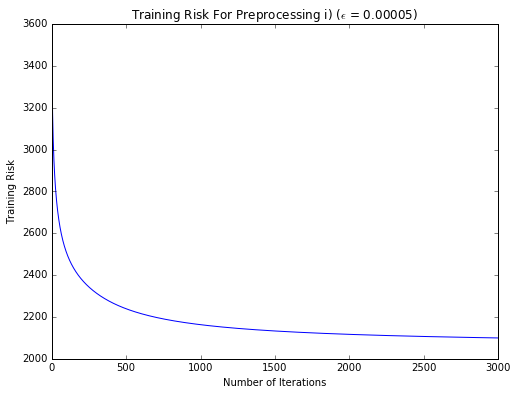

In [107]:
plt.figure(figsize=(8, 6))
plt.plot(batch_grad(X1, trainLabel, 0.00005, 3000))
plt.title("Training Risk For Preprocessing i) ($\epsilon$ = 0.00005)")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Risk")

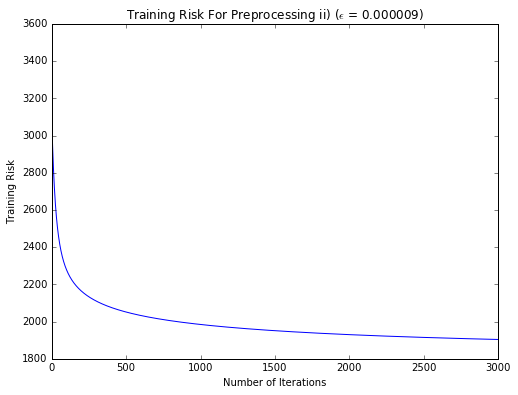

In [400]:
plt.figure(figsize=(8, 6))
plt.plot(batch_grad(X2, trainLabel, 0.000009, 3000))
plt.title("Training Risk For Preprocessing ii) ($\epsilon$ = 0.000009)")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Risk")

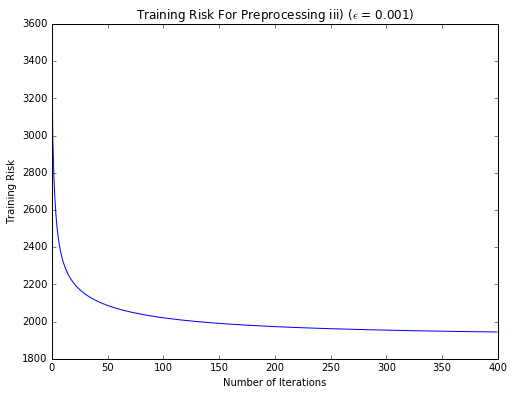

In [401]:
plt.figure(figsize=(8, 6))
plt.plot(batch_grad(X3, trainLabel, 0.001, 400))
plt.title("Training Risk For Preprocessing iii) ($\epsilon$ = 0.001)")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Risk")

In [108]:
def sto_grad(X, y, e, num_iter):
    w = 0.001 * np.ones(X.shape[1])
    risks = []
    y = y.T
    for i in range(num_iter):
        r = R(w, X, y)
        risks.append(r)
        idx = np.random.randint(X.shape[0])
        Xi = X[idx]
        yi = y[idx]
        w += e * lograd(w, Xi, yi)
    return risks

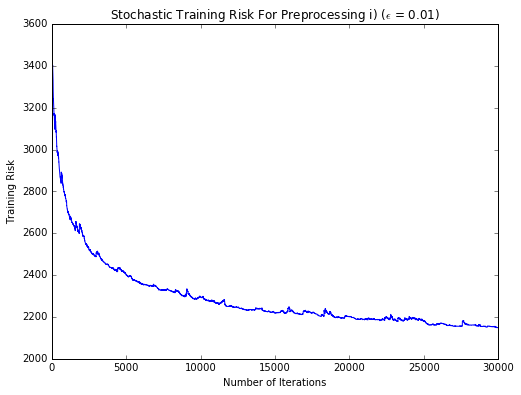

In [115]:
plt.figure(figsize=(8, 6))
plt.plot(sto_grad(X1, trainLabel, 0.01, 30000))
plt.title("Stochastic Training Risk For Preprocessing i) ($\epsilon$ = 0.01)")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Risk")

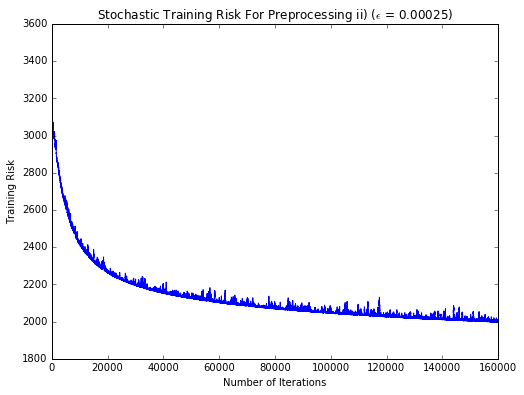

In [536]:
plt.figure(figsize=(8, 6))
plt.plot(sto_grad(X2, trainLabel, 0.00025, 160000))
plt.title("Stochastic Training Risk For Preprocessing ii) ($\epsilon$ = 0.00025)")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Risk")

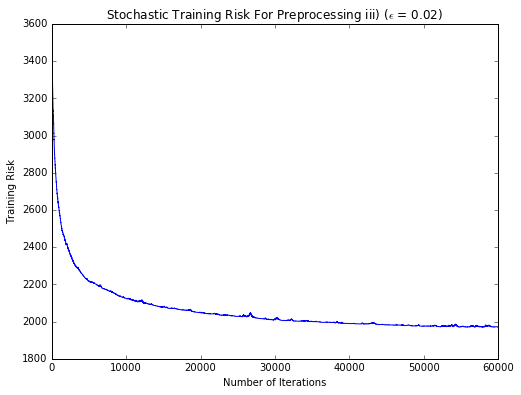

In [537]:
plt.figure(figsize=(8, 6))
plt.plot(sto_grad(X3, trainLabel, 0.02, 60000))
plt.title("Stochastic Training Risk For Preprocessing iii) ($\epsilon$ = 0.02)")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Risk")

In [110]:
def sto_grad2(X, y, e0, num_iter):
    w = 0.001 * np.ones(X.shape[1])
    risks = []
    y = y.T
    for i in range(num_iter):
        r = R(w, X, y)
        risks.append(r)
        Xi = X[i%X.shape[0]]
        yi = y[i%y.shape[0]]
        w += e0 / (i+1) * lograd(w, Xi, yi)
    return risks

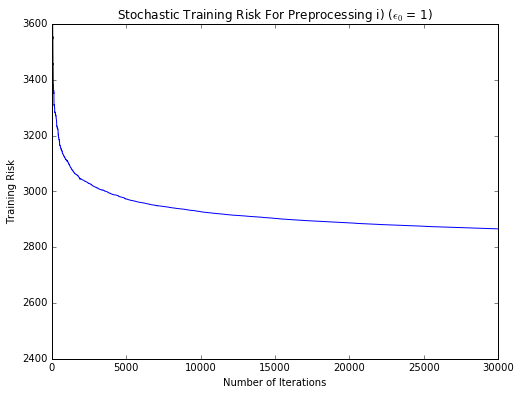

In [481]:
plt.figure(figsize=(8, 6))
plt.plot(sto_grad2(X1, trainLabel, 1, 30000))
plt.title("Stochastic Training Risk For Preprocessing i) ($\epsilon_0$ = 1)")
plt.xlabel("Number of Iterations")
plt.ylim((2400, 3600))
plt.ylabel("Training Risk")

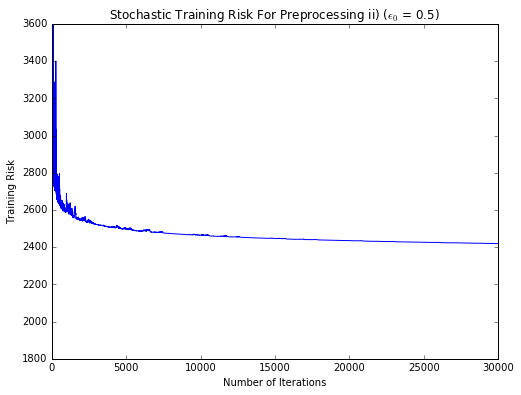

In [477]:
plt.figure(figsize=(8, 6))
plt.plot(sto_grad2(X2, trainLabel, 0.5, 30000))
plt.title("Stochastic Training Risk For Preprocessing ii) ($\epsilon_0$ = 0.5)")
plt.xlabel("Number of Iterations")
plt.ylim((1800, 3600))
plt.ylabel("Training Risk")

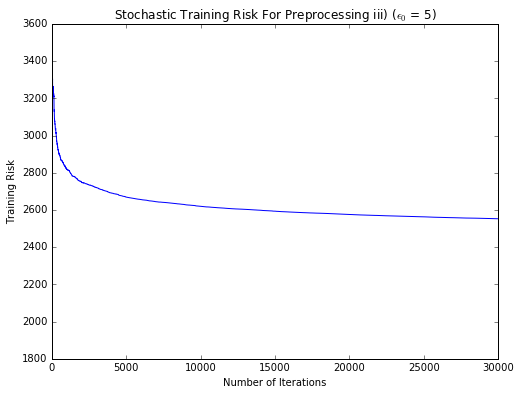

In [480]:
plt.figure(figsize=(8, 6))
plt.plot(sto_grad2(X3, trainLabel, 5, 30000))
plt.title("Stochastic Training Risk For Preprocessing iii) ($\epsilon_0$ = 5)")
plt.xlabel("Number of Iterations")
plt.ylim((1800, 3600))
plt.ylabel("Training Risk")

In [486]:
Ker = X3.dot(X3.T)
Ker = np.add(Ker, np.ones(Ker.shape) * 1)
Ker = np.power(Ker, 2)

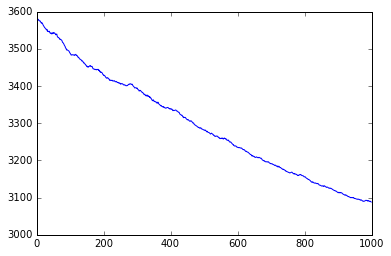

In [497]:
a = np.zeros(Ker.shape[0])
num_iter = 1000
e = 0.001
risks = []
y = trainLabel
for i in range(num_iter):
    Ka = np.dot(Ker, a)
    r = Risk(Ka, y)
    risks.append(r)
    idx = i%Ker.shape[0]
    a[idx] += e * (y[idx] - logS(Ka[idx]))
plt.plot(risks)

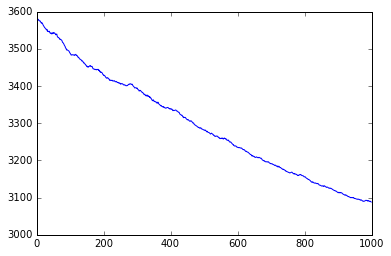

In [509]:
a = np.zeros(Ker.shape[0])
num_iter = 1000
e = 0.001
risks = []
y = trainLabel
Ka = np.dot(Ker, a)
for i in range(num_iter):
    r = Risk(Ka, y)
    risks.append(r)
    idx = i%Ker.shape[0]
    delta = e * (y[idx] - logS(Ka[idx]))
    a[idx] += delta
    Ka += delta * Ker[:, idx]
plt.plot(risks)

In [133]:
def ker_log(X, y, e, num_iter, rho):
    Ker = X.dot(X.T)
    Ker = np.add(Ker, np.ones(Ker.shape) * rho)
    Ker = np.power(Ker, 2)
    a = np.zeros(Ker.shape[0])
    risks = []
    Ka = np.dot(Ker, a)
    for i in range(num_iter):
        r = Risk(Ka, y)
        risks.append(r)
        idx = np.random.randint(Ker.shape[0])
        delta = e * (y[idx] - logS(Ka[idx]))
        a[idx] += delta
        Ka += delta * Ker[:, idx]
    return risks

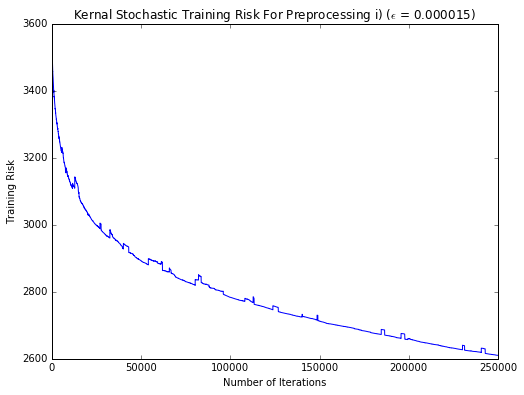

In [138]:
plt.figure(figsize=(8, 6))
plt.plot(ker_log(X1, trainLabel, 0.000015, 250000, 0.01))
plt.title("Kernal Stochastic Training Risk For Preprocessing i) ($\epsilon$ = 0.000015)")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Risk")

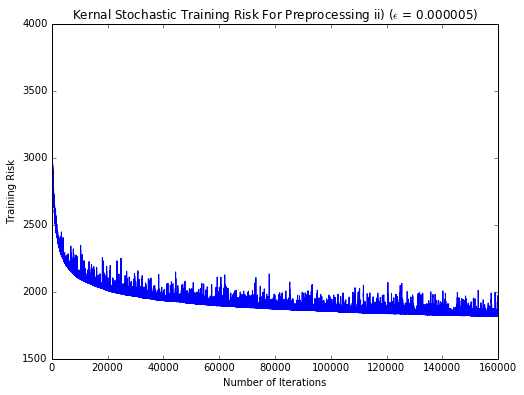

In [543]:
plt.figure(figsize=(8, 6))
plt.plot(ker_log(X2, trainLabel, 0.000005, 160000, 1))
plt.title("Kernal Stochastic Training Risk For Preprocessing ii) ($\epsilon$ = 0.000005)")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Risk")

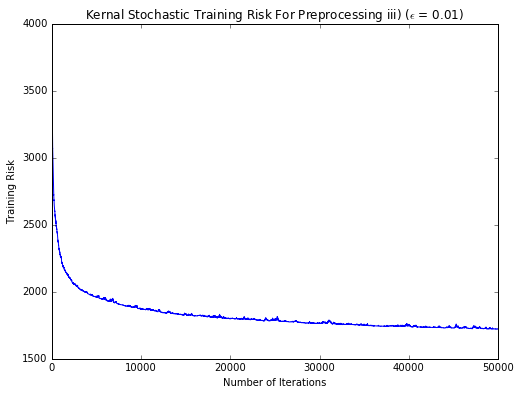

In [541]:
plt.figure(figsize=(8, 6))
plt.plot(ker_log(X3, trainLabel, 0.01, 50000, 1))
plt.title("Kernal Stochastic Training Risk For Preprocessing iii) ($\epsilon$ = 0.01)")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Risk")

In [78]:
def poly_ker(X, Z, rho):
    Ker = X.dot(Z)
    Ker = np.add(Ker, np.ones(Ker.shape) * rho)
    Ker = np.power(Ker, 2)
    return Ker
def ker_log_ridge(X, y, e, num_iter, rho, lam):
    Ker = poly_ker(X, X.T, rho)
    a = np.zeros(Ker.shape[0])
    risks = []
    Ka = np.dot(Ker, a)
    ridge = e * lam * np.ones(Ker.shape[0])
    ridgeKa = np.dot(Ker, ridge)
    for i in range(num_iter):
        r = Risk(Ka, y)
        risks.append(r)
        idx = np.random.randint(Ker.shape[0])
        delta = e * (y[idx] - logS(Ka[idx]))
        a[idx] += delta
        a -= ridge
        Ka += delta * Ker[:, idx]
        Ka -= ridgeKa
    return risks, a

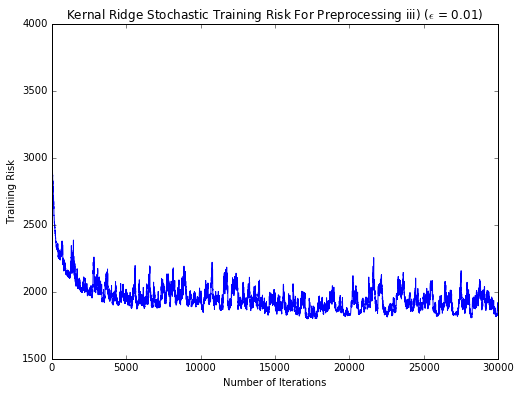

In [92]:
plt.figure(figsize=(8, 6))
plt.plot(ker_log_ridge(X3, trainLabel, 0.01, 30000, 2.75, 10**(-5))[0])
plt.title("Kernal Ridge Stochastic Training Risk For Preprocessing iii) ($\epsilon$ = 0.01)")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Risk")

In [30]:
def ker_log_test(X, y, e, num_iter, rho):
    Ker = poly_ker(X, X.T, rho)
    a = np.zeros(Ker.shape[0])
    risks = []
    Ka = np.dot(Ker, a)
    for i in range(num_iter):
        r = Risk(Ka, y)
        risks.append(r)
        idx = i%Ker.shape[0]#np.random.randint(Ker.shape[0])
        delta = e * (y[idx] - logS(Ka[idx]))
        a[idx] += delta
        Ka += delta * Ker[:, idx]
    #print(Ka, np.max(Ka))
    #print(risks[-1])
    #pred = np.around(logS(Ka))
    #print(np.sum(np.abs(pred- y)), pred, y, pred.shape[0])
    return risks, a

In [660]:
a = ker_log_test(X3, trainLabel, 0.01, 50000, 1)[1]
tot = 0
for i in range(a.shape[0]):
    tot += a[i] * poly_ker(X3[i], X3[1], 1)
print(tot)

[-3.46733699 -4.39416663  0.32869703 ..., -0.728059    2.1503429
 -2.61517305] 16.3366935895
1740.31038616
815.0 [ 0.  0.  1. ...,  0.  1.  0.] [ 0.  0.  0. ...,  0.  1.  0.] 5172
-4.39416662699


In [31]:
def crossvalidate(X, y, e, num_iter, rho, lam):
    error = 0
    size = int(X.shape[0]/10)
    for i in range(10):
        trainX = np.concatenate((X[:i*size], X[(i+1)*size:]))
        trainY = np.concatenate((y[:i*size], y[(i+1)*size:]))
        validX = X[i*size:(i+1)*size]
        validY = y[i*size:(i+1)*size]
        risk, a = ker_log_test(trainX, trainY, e, num_iter, rho)
        Ker = poly_ker(trainX, validX.T, rho)
        pred = np.around(logS(a.dot(Ker)))
        err = np.sum(np.abs(pred- validY))/ pred.shape[0]
        print(err,risk[-1])
        error += err
    return error/10

In [27]:
crossvalidate(X3, trainLabel, 0.01, 10000, 1, 10**(-3))

KeyboardInterrupt: 

In [36]:
errs = [crossvalidate(X3, trainLabel, 0.01, X3.shape[0]*2, P, 10**(-3)) for P in [4, 6, 15]]

0.166344294004 1629.97916892
0.160541586074 1629.62277608
0.189555125725 1612.65078108
0.15667311412 1639.6570323
0.199226305609 1606.48769043
0.148936170213 1640.90008469
0.177949709865 1619.9986349
0.129593810445 1658.78190883
0.164410058027 1636.60754959
0.164410058027 1634.44824285
0.170212765957 1626.0488082
0.166344294004 1625.14748062
0.183752417795 1629.29017431
0.166344294004 1659.43275537
0.197292069632 1618.87371652
0.148936170213 1659.84459342
0.191489361702 1638.64513799
0.123791102515 1678.75661557
0.166344294004 1649.98263037
0.164410058027 1653.77183627
0.257253384913 1921.07415574
0.26499032882 1919.16187348
0.185686653772 1623.91687144
0.160541586074 1655.50106892
0.197292069632 1619.5173129
0.145067698259 1664.07808789
0.181818181818 1638.41286201
0.129593810445 1678.84159814
0.170212765957 1650.91601152
0.168278529981 1649.76753048


In [35]:
print(errs)

[0.16847195357833655, 0.17137330754352031, 0.17021276595744683, 0.1667311411992263, 0.1727272727272727]


In [37]:
print(errs)

[0.16576402321083172, 0.16789168278529978, 0.18607350096711803]


In [38]:
errs = [crossvalidate(X3, trainLabel, 0.01, X3.shape[0]*2, P, 10**(-3)) for P in [2, 3]]
print(errs)

0.16247582205 1651.10318591
0.154738878143 1651.08448684
0.185686653772 1631.20697512
0.154738878143 1655.77035923
0.197292069632 1628.02526253
0.15087040619 1658.510448
0.183752417795 1636.22455345
0.125725338491 1674.39646798
0.164410058027 1655.87111444
0.164410058027 1651.59872776
0.16247582205 1636.90912562
0.15667311412 1637.01804357
0.187620889749 1616.59701821
0.154738878143 1642.2909159
0.199226305609 1612.35722543
0.15087040619 1644.21805244
0.179883945841 1622.80045354
0.123791102515 1661.27248254
0.164410058027 1641.35971061
0.164410058027 1637.44401332
[0.16441005802707931, 0.16441005802707931]


In [39]:
errs = [crossvalidate(X3, trainLabel, 0.01, X3.shape[0]*2, P, 10**(-3)) for P in [2.25, 2.5, 2.75]]
print(errs)

0.16247582205 1646.58914092
0.154738878143 1646.67553997
0.185686653772 1626.48352392
0.154738878143 1651.30833748
0.197292069632 1623.14511911
0.15087040619 1653.83858904
0.179883945841 1631.79439947
0.127659574468 1670.05645294
0.164410058027 1651.25633956
0.164410058027 1646.92763347
0.16247582205 1642.79351278
0.15667311412 1642.9314134
0.185686653772 1622.50474567
0.154738878143 1647.60700185
0.193423597679 1618.93216977
0.15087040619 1649.92978842
0.179883945841 1628.11350368
0.127659574468 1666.45283466
0.164410058027 1647.33277635
0.164410058027 1643.04500924
0.16247582205 1639.59765562
0.15667311412 1639.74149226
0.187620889749 1619.21772716
0.154738878143 1644.61036529
0.193423597679 1615.34206126
0.15087040619 1646.73147821
0.179883945841 1625.1248438
0.123791102515 1663.53274759
0.164410058027 1644.04284031
0.164410058027 1639.89405189
[0.16421663442940038, 0.16402321083172147, 0.16382978723404257]


In [84]:
def ker_log_ridge2(X, y, e, num_iter, rho, lam):
    size = int(X.shape[0]*2/3)
    trainX = X[:size]
    trainY = y[:size]
    validX = X[size:]
    validY = y[size:]
    Ker = poly_ker(trainX, trainX.T, rho)
    KerV = poly_ker(trainX, validX.T, rho)
    a = np.zeros(Ker.shape[0])
    risks = []
    risksV = []
    Ka = np.dot(Ker, a)
    aK = a.dot(KerV)
    ridge = e * lam * np.ones(Ker.shape[0])
    ridgeKa = np.dot(Ker, ridge)
    ridgeaK = np.dot(ridge, KerV)
    for i in range(num_iter):
        #Ka = np.dot(Ker, a)
        #aK = a.dot(KerV)
        r = Risk(Ka, trainY)
        r2 = Risk(aK, validY)
        risks.append(r)
        risksV.append(r2)
        idx = np.random.randint(trainX.shape[0])
        delta = e * (trainY[idx] - logS(Ka[idx]))
        a[idx] += delta
        a -= ridge
        Ka += delta * Ker[:, idx]
        Ka -= ridgeKa
        aK += delta * KerV[idx]
        aK -= ridgeaK
    return risks, risksV, a

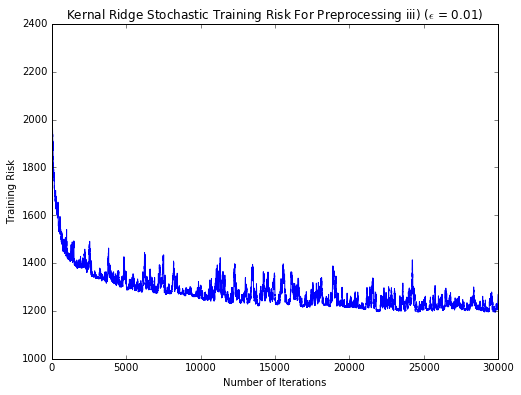

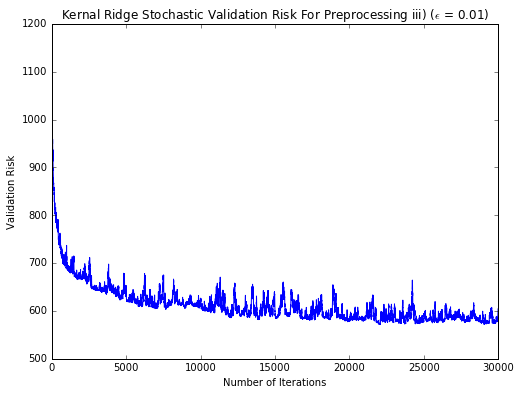

In [86]:
risks, risksV, a = ker_log_ridge2(X3, trainLabel, 0.01, 30000, 2.75, 10**(-5))
plt.figure(figsize=(8, 6))
plt.plot(risks)
plt.title("Kernal Ridge Stochastic Training Risk For Preprocessing iii) ($\epsilon$ = 0.01)")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Risk")
plt.figure(figsize=(8, 6))
plt.plot(risksV)
plt.title("Kernal Ridge Stochastic Validation Risk For Preprocessing iii) ($\epsilon$ = 0.01)")
plt.xlabel("Number of Iterations")
plt.ylabel("Validation Risk")

In [113]:
def lin_ker(X, Z, rho):
    Ker = X.dot(Z)
    Ker = np.add(Ker, np.ones(Ker.shape) * rho)
    return Ker
def ker_log_lin(X, y, e, num_iter, rho):
    Ker = lin_ker(X, X.T, rho)
    a = np.zeros(Ker.shape[0])
    risks = []
    Ka = np.dot(Ker, a)
    for i in range(num_iter):
        r = Risk(Ka, y)
        risks.append(r)
        idx = np.random.randint(Ker.shape[0])
        delta = e * (y[idx] - logS(Ka[idx]))
        a[idx] += delta
        Ka += delta * Ker[:, idx]
    return risks
def ker_log_ridge_lin(X, y, e, num_iter, rho, lam):
    Ker = lin_ker(X, X.T, rho)
    a = np.zeros(Ker.shape[0])
    risks = []
    Ka = np.dot(Ker, a)
    ridge = e * lam * np.ones(Ker.shape[0])
    ridgeKa = np.dot(Ker, ridge)
    for i in range(num_iter):
        r = Risk(Ka, y)
        risks.append(r)
        idx = np.random.randint(Ker.shape[0])
        delta = e * (y[idx] - logS(Ka[idx]))
        a[idx] += delta
        a -= ridge
        Ka += delta * Ker[:, idx]
        Ka -= ridgeKa
    return risks, a

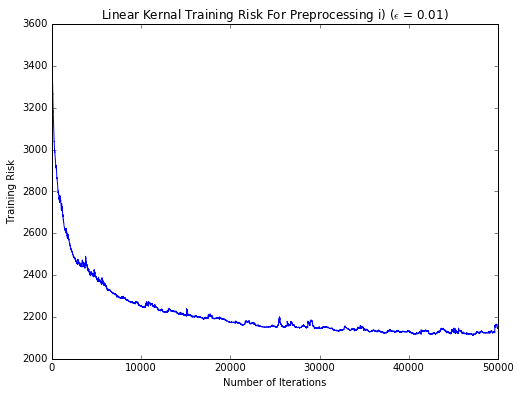

In [120]:
plt.figure(figsize=(8, 6))
plt.plot(ker_log_lin(X1, trainLabel, 0.01, 50000, 0.01))
plt.title("Linear Kernal Training Risk For Preprocessing i) ($\epsilon$ = 0.01)")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Risk")

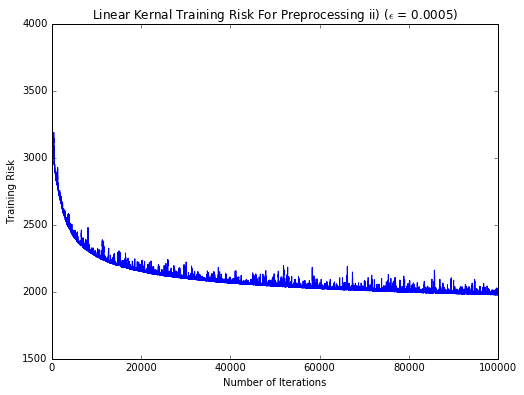

In [118]:
plt.figure(figsize=(8, 6))
plt.plot(ker_log_lin(X2, trainLabel, 0.0005, 100000, 1))
plt.title("Linear Kernal Training Risk For Preprocessing ii) ($\epsilon$ = 0.0005)")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Risk")

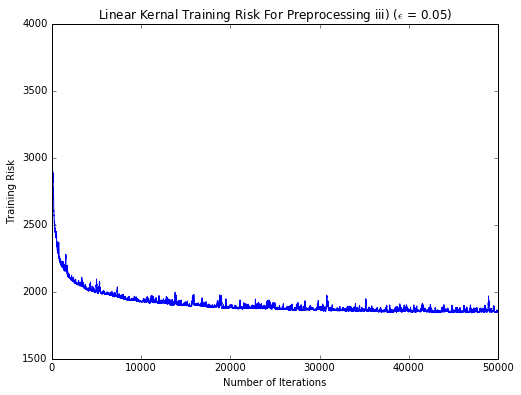

In [119]:
plt.figure(figsize=(8, 6))
plt.plot(ker_log_lin(X3, trainLabel, 0.05, 50000, 1))
plt.title("Linear Kernal Training Risk For Preprocessing iii) ($\epsilon$ = 0.05)")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Risk")

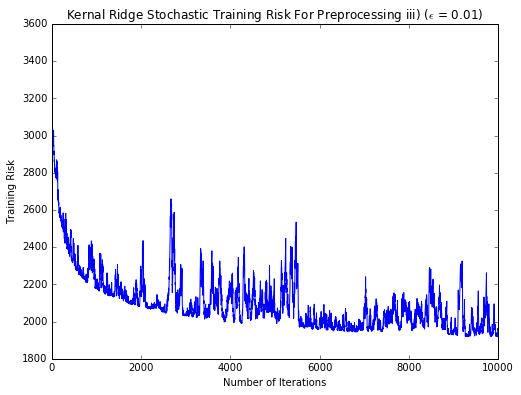

In [110]:
plt.figure(figsize=(8, 6))
plt.plot(ker_log_ridge_lin(X3, trainLabel, 0.05, 10000, 2.75, 10**(-5))[0])
plt.title("Kernal Ridge Stochastic Training Risk For Preprocessing iii) ($\epsilon$ = 0.01)")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Risk")

In [111]:
def ker_log_test_lin(X, y, e, num_iter, rho):
    Ker = lin_ker(X, X.T, rho)
    a = np.zeros(Ker.shape[0])
    risks = []
    Ka = np.dot(Ker, a)
    for i in range(num_iter):
        r = Risk(Ka, y)
        risks.append(r)
        idx = i%Ker.shape[0]#np.random.randint(Ker.shape[0])
        delta = e * (y[idx] - logS(Ka[idx]))
        a[idx] += delta
        Ka += delta * Ker[:, idx]
    #print(Ka, np.max(Ka))
    #print(risks[-1])
    #pred = np.around(logS(Ka))
    #print(np.sum(np.abs(pred- y)), pred, y, pred.shape[0])
    return risks, a
def crossvalidate_lin(X, y, e, num_iter, rho, lam):
    error = 0
    size = int(X.shape[0]/10)
    for i in range(10):
        trainX = np.concatenate((X[:i*size], X[(i+1)*size:]))
        trainY = np.concatenate((y[:i*size], y[(i+1)*size:]))
        validX = X[i*size:(i+1)*size]
        validY = y[i*size:(i+1)*size]
        risk, a = ker_log_test_lin(trainX, trainY, e, num_iter, rho)
        Ker = lin_ker(trainX, validX.T, rho)
        pred = np.around(logS(a.dot(Ker)))
        err = np.sum(np.abs(pred- validY))/ pred.shape[0]
        print(err,risk[-1])
        error += err
    return error/10

In [112]:
errs = [crossvalidate(X3, trainLabel, 0.01, X3.shape[0]*2, P, 10**(-3)) for P in [0,0.0001,0.001,0.01,0.1,1]]
print(errs)

0.185686653772 1990.72999972
0.187620889749 1987.64238127
0.203094777563 1975.36215938
0.174081237911 1992.83385981
0.222437137331 1980.22345579
0.16247582205 1998.69433861
0.206963249516 1973.33440849
0.154738878143 2005.52018346
0.193423597679 1993.28297514
0.170212765957 1989.03018932
0.185686653772 1990.47090947
0.187620889749 1987.38440141
0.203094777563 1975.09918214
0.174081237911 1992.57403603
0.222437137331 1979.93279378
0.16247582205 1998.44413286
0.206963249516 1973.07112254
0.154738878143 2005.26316221
0.193423597679 1993.00866573
0.170212765957 1988.77209507
0.185686653772 1988.16668867
0.185686653772 1985.08988411
0.201160541586 1972.76027948
0.174081237911 1990.26320377
0.222437137331 1977.34745901
0.160541586074 1996.21899871
0.206963249516 1970.72954884
0.154738878143 2002.97770394
0.193423597679 1990.56878687
0.170212765957 1986.47685331
0.187620889749 1967.64281393
0.181818181818 1964.63763751
0.199226305609 1951.91755718
0.172147001934 1969.67285251
0.228239845261 1

In [113]:
errs = [crossvalidate(X3, trainLabel, 0.01, X3.shape[0]*2, P, 10**(-3)) for P in [0.005,0.05]]
print(errs)

0.187620889749 1978.50240127
0.185686653772 1975.4627844
0.201160541586 1962.94819976
0.172147001934 1980.56939078
0.228239845261 1966.49725959
0.158607350097 1986.8878853
0.206963249516 1960.90779803
0.154738878143 1993.39947691
0.193423597679 1980.32922434
0.170212765957 1976.85269432
0.185686653772 1914.38344103
0.176015473888 1911.38929227
0.193423597679 1897.69971573
0.176015473888 1916.14987582
0.226305609284 1894.02611225
0.15667311412 1925.06862097
0.20502901354 1895.69043609
0.152804642166 1930.27349543
0.189555125725 1911.99869882
0.179883945841 1913.14243076
[0.18588007736943907, 0.18413926499032879]


In [114]:
errs = [crossvalidate(X3, trainLabel, 0.01, X3.shape[0]*2, P, 10**(-3)) for P in [0.008,0.02]]
print(errs)

0.187620889749 1971.83313661
0.181818181818 1968.81564898
0.201160541586 1956.17455786
0.172147001934 1973.877937
0.228239845261 1959.00247426
0.15667311412 1980.45001847
0.203094777563 1954.12904067
0.154738878143 1986.79698295
0.191489361702 1973.25654768
0.170212765957 1970.21359905
0.187620889749 1949.4094926
0.179883945841 1946.44176582
0.199226305609 1933.38260625
0.174081237911 1951.36694977
0.230174081238 1933.74946926
0.154738878143 1958.81478411
0.201160541586 1931.33108049
0.154738878143 1964.64902091
0.187620889749 1949.43031029
0.176015473888 1947.90862208
[0.18471953578336556, 0.18452611218568665]


In [115]:
def ker_log_ridge2_lin(X, y, e, num_iter, rho, lam):
    size = int(X.shape[0]*2/3)
    trainX = X[:size]
    trainY = y[:size]
    validX = X[size:]
    validY = y[size:]
    Ker = lin_ker(trainX, trainX.T, rho)
    KerV = lin_ker(trainX, validX.T, rho)
    a = np.zeros(Ker.shape[0])
    risks = []
    risksV = []
    Ka = np.dot(Ker, a)
    aK = a.dot(KerV)
    ridge = e * lam * np.ones(Ker.shape[0])
    ridgeKa = np.dot(Ker, ridge)
    ridgeaK = np.dot(ridge, KerV)
    for i in range(num_iter):
        #Ka = np.dot(Ker, a)
        #aK = a.dot(KerV)
        r = Risk(Ka, trainY)
        r2 = Risk(aK, validY)
        risks.append(r)
        risksV.append(r2)
        idx = np.random.randint(trainX.shape[0])
        delta = e * (trainY[idx] - logS(Ka[idx]))
        a[idx] += delta
        a -= ridge
        Ka += delta * Ker[:, idx]
        Ka -= ridgeKa
        aK += delta * KerV[idx]
        aK -= ridgeaK
    return risks, risksV, a

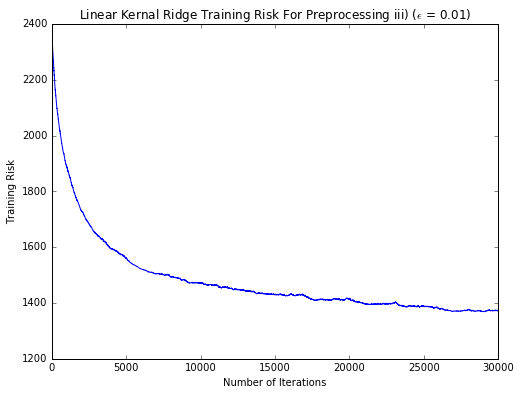

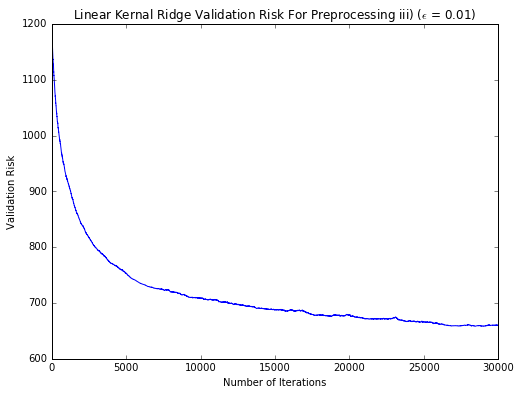

In [116]:
risks, risksV, a = ker_log_ridge2_lin(X3, trainLabel, 0.01, 30000, 0.01, 10**(-5))
plt.figure(figsize=(8, 6))
plt.plot(risks)
plt.title("Linear Kernal Ridge Training Risk For Preprocessing iii) ($\epsilon$ = 0.01)")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Risk")
plt.figure(figsize=(8, 6))
plt.plot(risksV)
plt.title("Linear Kernal Ridge Validation Risk For Preprocessing iii) ($\epsilon$ = 0.01)")
plt.xlabel("Number of Iterations")
plt.ylabel("Validation Risk")

In [2]:
spam_data = loadmat("spam_data.mat")
spamTest = spam_data["test_data"]
trainLabel = spam_data["training_labels"][0]
trainData = spam_data["training_data"]

print(spamTest.shape, trainLabel.shape, trainData.shape)

(5857, 91) (5172,) (5172, 91)


In [3]:
X3 = np.int8(trainData > 0)
print(X3, np.max(X3))

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 1 0]
 [0 0 0 ..., 0 1 0]] 1


In [4]:
def logS(x):
    return 1.0/(1.0+np.exp(-x))
def Risk(ka, y):
    si = logS(ka)
    R = np.dot(y, np.log(si))
    R += np.dot(1-y, np.log(1-si))
    return -R
def R(w, X, y):
    return Risk(X.dot(w), y)
def poly_ker(X, Z, rho):
    Ker = X.dot(Z)
    Ker = np.add(Ker, np.ones(Ker.shape) * rho)
    Ker = np.power(Ker, 2)
    return Ker

In [5]:
Ker = X3.dot(X3.T)

In [6]:
Ker = poly_ker(X3, X3.T, 1)

In [7]:
def ker_log_sto(X, y, e, num_iter, rho):
    Ker = poly_ker(X, X.T, rho)
    a = np.zeros(Ker.shape[0])
    risks = []
    Ka = np.dot(Ker, a)
    for i in range(num_iter):
        r = Risk(Ka, y)
        risks.append(r)
        idx = np.random.randint(Ker.shape[0])
        delta = e * (y[idx] - logS(Ka[idx]))
        a[idx] += delta
        Ka += delta * Ker[:, idx]
    return risks, a

In [8]:
def ker_log_batch(X, y, e, num_iter, rho):
    Ker = poly_ker(X, X.T, rho)
    a = np.zeros(Ker.shape[0])
    risks = []
    for i in range(num_iter):
        Ka = np.dot(Ker, a)
        r = Risk(Ka, y)
        risks.append(r)
        delta = e * (y - logS(Ka))
        a += delta
    return risks, a

In [35]:
risks, a = ker_log_batch(X3, trainLabel, 0.0001, 10000, 1)

[  1.59448428e-02   1.83774926e-02   1.98518173e-01 ...,  -2.16821774e-04
  -5.15202091e-05  -5.09907590e-05]


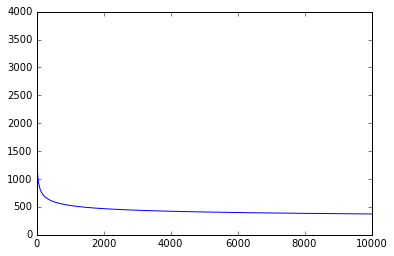

In [36]:
plt.plot(risks)
print(a)

[  7.29794616e-03   1.12497283e-02   0.00000000e+00 ...,  -8.71675525e-05
  -2.92286915e-08  -5.57123455e-06]


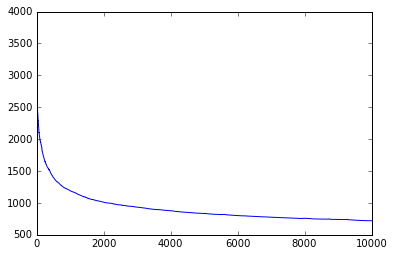

In [34]:
risks, a = ker_log_sto(X3, trainLabel, 0.01, 10000, 1)
plt.plot(risks)
print(a)

In [40]:
def crossvalidate_batch(X, y, e, num_iter, rho):
    error = 0
    size = int(X.shape[0]/10)
    for i in range(10):
        trainX = np.concatenate((X[:i*size], X[(i+1)*size:]))
        trainY = np.concatenate((y[:i*size], y[(i+1)*size:]))
        validX = X[i*size:(i+1)*size]
        validY = y[i*size:(i+1)*size]
        risk, a = ker_log_batch(trainX, trainY, e, num_iter, rho)
        Ker = poly_ker(trainX, validX.T, rho)
        pred = np.around(logS(a.dot(Ker)))
        err = np.sum(np.abs(pred- validY))/ pred.shape[0]
        print(err,risk[-1])
        error += err
    return error/10

In [41]:
errs = [crossvalidate_batch(X3, trainLabel, 0.0001, 1000, P) for P in [0.1, 1, 10]]
print(errs)

0.0773694390716 525.60663384
0.0889748549323 513.32442026
0.135396518375 518.395568392
0.0464216634429 598.582032859
0.0522243713733 601.090110745
0.0309477756286 613.653765571
0.0386847195358 605.053923098
0.0425531914894 603.440115506
0.0580270793037 593.565583806
0.0618955512573 600.626595286
0.0560928433269 451.475062677
0.0696324951644 443.43097491
0.114119922631 442.913105602
0.0580270793037 478.458661439
0.0618955512573 477.035434676
0.0425531914894 496.653422602
0.0464216634429 484.414034266
0.0580270793037 483.215188528
0.063829787234 471.6969657
0.073500967118 482.007586868
0.0696324951644 390.602032888
0.073500967118 385.196504012
0.116054158607 384.532348805
0.0502901353965 419.588590296
0.0560928433269 416.193799574
0.0386847195358 435.95736272
0.0464216634429 421.560799323
0.0541586073501 421.393985331
0.0599613152805 408.954861407
0.0580270793037 421.25563052
[0.063249516441005793, 0.064410058027079303, 0.062282398452611222]


[  1.87824447e-02   1.40469648e-02   1.22697741e-01 ...,  -2.01179760e-04
  -5.21969875e-05  -5.14122958e-05]


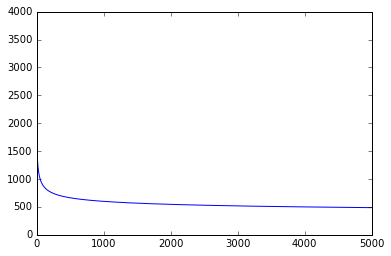

In [9]:
risks, a = ker_log_batch(X3, trainLabel, 0.0001, 5000, 1)
plt.plot(risks)
print(a)

In [10]:
print(risks[-3:])

[486.72125624398768, 486.70985770651293, 486.69846205066534]


In [11]:
Ker = poly_ker(trainData, spamTest.T, 1)
pred = np.around(logS(a.dot(Ker)))

c:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from IPython.kernel.zmq import kernelapp as app


In [12]:
pred

array([ 1.,  0.,  0., ...,  1.,  0.,  1.])

In [13]:
with open("spam.csv", "w") as csvfile:
    csvfile.write("Id,Category\n")
    for i in range(len(pred)):
        csvfile.write(str(i+1)+","+str(int(pred[i]))+"\n")